In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.preprocessing import StandardScaler

In [2]:
current_dir = os.getcwd() + '\haberman_survival\haberman.data'
print(current_dir)
#Features in this dataset are: 
# 1. Age of patient at time of operation (numerical)
# 2. Patient's year of operation (year - 1900, numerical)
# 3. Number of positive axillary nodes detected (numerical)
# 4. Survival status (Class attribute)
#       -- 1 = the patient survived 5 years or longer
#       -- 2 = the patient died within 5 year

features_avail = ['PatientAge','OperationDate','DetectedNodes', 'Status'] 
df = pd.read_csv(current_dir, names = features_avail)

C:\Users\rjtdu\OneDrive\Desktop\Data Mining\Lab 1\haberman_survival\haberman.data


In [3]:
print(df.shape)
df.head(10)

(306, 4)


,PatientAge,OperationDate,DetectedNodes,Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,2
8,34,66,9,2
9,34,58,30,1


In [4]:
df_arr = np.asarray(df)
X = np.delete(df_arr, 3, axis = 1)
targets = df_arr[:,3]
targets[targets == 1] = 0
targets[targets == 2] = 1
print(targets)
df = df.drop('Status', axis = 1)
print(df.shape)
df.head()

[0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1
 1 1 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 1 1 0
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0
 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 1 1 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0
 0 0 0 1 0 0 0 0 1 1]
(306, 3)


,PatientAge,OperationDate,DetectedNodes
0,30,64,1
1,30,62,3
2,30,65,0
3,31,59,2
4,31,65,4


In [5]:
scaler = StandardScaler()
normalized_haberman = scaler.fit_transform(df)
df = pd.DataFrame(data = normalized_haberman, columns = features_avail[0:-1])
df

,PatientAge,OperationDate,DetectedNodes
0,-2.082140,0.353584,-0.421592
1,-2.082140,-0.262921,-0.142959
2,-2.082140,0.661837,-0.560909
3,-1.989426,-1.187680,-0.282275
4,-1.989426,0.661837,-0.003642
...,...,...,...
301,2.090018,-0.262921,-0.421592
302,2.182732,1.278342,-0.560909
303,2.275447,0.661837,-0.142959
304,2.368162,0.661837,-0.421592


In [6]:
#Calculating Variance
var_arr = []
p_age = normalized_haberman[:,0]
p_od = normalized_haberman[:,1]
p_dn = normalized_haberman[:,2]
list_avail = [p_age,p_od,p_dn]
for i in range(len(list_avail)):
    calc_var = np.var(list_avail[i])
    var_arr.append(calc_var)
var_arr

[1.0, 0.9999999999999998, 0.9999999999999998]

In [7]:
covariance_mat = np.cov(df.T)

In [8]:
covariance_mat

array([[ 1.00327869,  0.08982298, -0.06338324],
       [ 0.08982298,  1.00327869, -0.00377682],
       [-0.06338324, -0.00377682,  1.00327869]])

In [9]:
#Calculating Eigenvector And EigenValues
eigenvalues, eigenvectors = np.linalg.eig(covariance_mat)
print(eigenvalues)
print(eigenvectors)

[1.11501387 0.89510139 0.9997208 ]
[[ 0.70131829  0.71275488  0.01153822]
 [ 0.57789155 -0.57794675  0.57621082]
 [-0.41736555  0.39743934  0.81721965]]


In [10]:
#Finding Proportion of variance
tot = eigenvalues.sum()
pov = (eigenvalues/tot) * 100
pov

array([37.04566767, 29.73920756, 33.21512477])

In [43]:
#Change of basis (Y = PX)
P = eigenvectors.copy()
X = df.T
Y = np.matmul(P.T,X)
Y

,0,1,2,3,4,5,6,7,8,9,...,296,297,298,299,300,301,302,303,304,305
0,-1.079952,-1.552517,-0.843669,-1.963759,-1.011230,-2.477018,-1.539285,-1.652399,-0.928756,-3.574914,...,2.069110,1.417887,2.486707,1.842881,1.661046,1.489786,2.503637,2.037949,2.219263,1.239273
1,-1.855966,-1.388918,-2.089489,-0.843744,-1.801927,-0.090466,-1.000472,-0.756236,-1.504983,1.083015,...,0.495791,1.286532,0.217610,0.984264,1.174461,1.474068,0.594012,1.182512,1.137855,2.770715
2,-0.164819,-0.292351,-0.101052,-0.937989,0.355427,-0.202650,-0.985936,-1.162485,1.105516,2.075464,...,0.640672,-0.587908,0.477803,0.287574,-0.409220,-0.471916,0.303394,0.290783,0.064149,-1.059980


In [12]:
cov_y = np.cov(Y)
print(cov_y)
print("As you can see the diagonal elements are dominant and non-diagonal elements are almost 0")

[[ 1.11501387e+00 -1.89283926e-17  5.60571626e-17]
 [-1.89283926e-17  8.95101395e-01 -1.95108046e-16]
 [ 5.60571626e-17 -1.95108046e-16  9.99720805e-01]]
As you can see the diagonal elements are dominant and non-diagonal elements are almost 0


(306, 3)


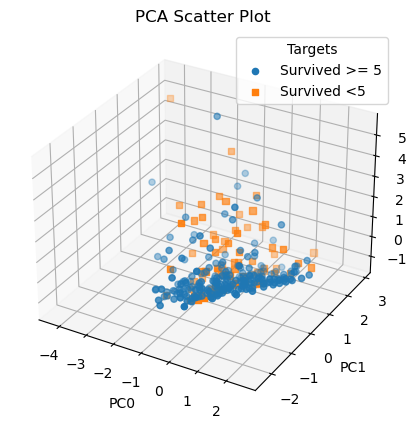

In [45]:
#Taking Only 3 Principle Component
Plot_mat = Y.T
Plot_mat = np.asarray(Plot_mat)

print(Plot_mat.shape) 
# Define marker styles for each class
marker_styles = ['o', 's', '^']  # Use different markers for each class

# Plot the scatter plot with different markers
fig = plt.figure(figsize = (5,5))
ax = fig.add_subplot(111, projection='3d')
a = Plot_mat[:, 0]
b = Plot_mat[:, 1]
c = Plot_mat[:, 2]

scatter_handles = []
for label in set(targets):
    mask = [t == label for t in targets]
    scatter = ax.scatter(a[mask],b[mask], c[mask], marker=marker_styles[label], label=target_names[label])
    scatter_handles.append(scatter)

ax.set_xlabel('PC0')
ax.set_ylabel('PC1')
ax.set_zlabel('PC2')
# plt.axis('equal')
plt.grid()
plt.title('PCA Scatter Plot')

# Add legend
plt.legend(handles=scatter_handles, title='Targets')
plt.savefig('[0,1,2].png')


plt.show()

In [13]:
def PCAAnalysis(set):
    print("Subset: ", set)
    print("No of principle components: ", len(set))
    neweig = eigenvectors[:,set]
    # print(neweig.shape)
    # print(X.shape)
    mat = np.matmul(neweig.T,X)
    covariance_calc = np.cov(mat)
    print("Covariance for this subset is: ")
    print(covariance_calc)
    return mat



In [14]:
print(targets)

[0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1
 1 1 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 1 1 0
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0
 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 1 1 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0
 0 0 0 1 0 0 0 0 1 1]


Subset:  [0]
No of principle components:  1
Covariance for this subset is: 
1.115013866214867


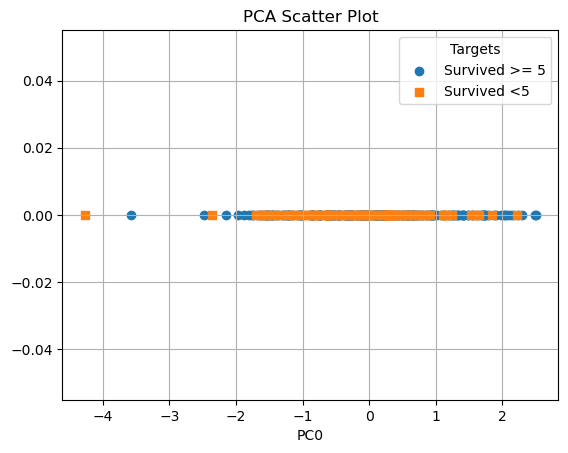

In [30]:
#Taking Only 1 Principle Component
Plot_mat = PCAAnalysis([0]).T
target_names = ['Survived >= 5', 'Survived <5']
# print(target_names)
# print(Plot_mat.shape)
# Define marker styles for each class
marker_styles = ['o', 's', '^']  # Use different markers for each class
# print(Plot_mat)
# Plot the scatter plot with different markers
scatter_handles = []
for label in set(targets):
    mask = [t == label for t in targets]
    scatter = plt.scatter(Plot_mat[mask], [0] * len(Plot_mat[0][mask]), marker=marker_styles[label], label=target_names[label])
    scatter_handles.append(scatter)

plt.xlabel('PC0')
plt.grid()
plt.title('PCA Scatter Plot')


# Add legend
plt.legend(handles=scatter_handles, title='Targets')
plt.savefig('[0].png')


plt.show()

Subset:  [1]
No of principle components:  1
Covariance for this subset is: 
0.8951013946830658


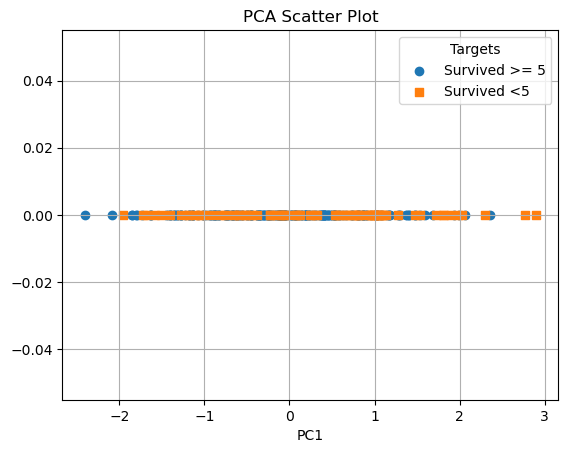

In [31]:
#Taking Only 1 Principle Component
Plot_mat = PCAAnalysis([1]).T
# print(target_names)
# print(Plot_mat.shape)
# Define marker styles for each class
marker_styles = ['o', 's', '^']  # Use different markers for each class
# print(Plot_mat)
# Plot the scatter plot with different markers
scatter_handles = []
for label in set(targets):
    mask = [t == label for t in targets]
    scatter = plt.scatter(Plot_mat[mask], [0] * len(Plot_mat[0][mask]), marker=marker_styles[label], label=target_names[label])
    scatter_handles.append(scatter)

plt.xlabel('PC1')
plt.grid()
plt.title('PCA Scatter Plot')


# Add legend
plt.legend(handles=scatter_handles, title='Targets')
plt.savefig('[1].png')


plt.show()

Subset:  [2]
No of principle components:  1
Covariance for this subset is: 
0.9997208046758376


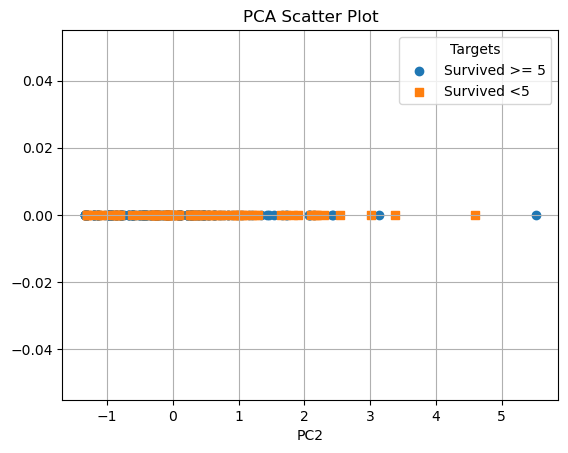

In [32]:
#Taking Only 1 Principle Component
Plot_mat = PCAAnalysis([2]).T

# print(target_names)
# print(Plot_mat.shape)
# Define marker styles for each class
marker_styles = ['o', 's', '^']  # Use different markers for each class
# print(Plot_mat)
# Plot the scatter plot with different markers
scatter_handles = []
for label in set(targets):
    mask = [t == label for t in targets]
    scatter = plt.scatter(Plot_mat[mask], [0] * len(Plot_mat[0][mask]), marker=marker_styles[label], label=target_names[label])
    scatter_handles.append(scatter)

plt.xlabel('PC2')
plt.grid()
plt.title('PCA Scatter Plot')


# Add legend
plt.legend(handles=scatter_handles, title='Targets')
plt.savefig('[2].png')


plt.show()

Subset:  [0, 1]
No of principle components:  2
Covariance for this subset is: 
[[ 1.11501387e+00 -1.89283926e-17]
 [-1.89283926e-17  8.95101395e-01]]
(2, 306)


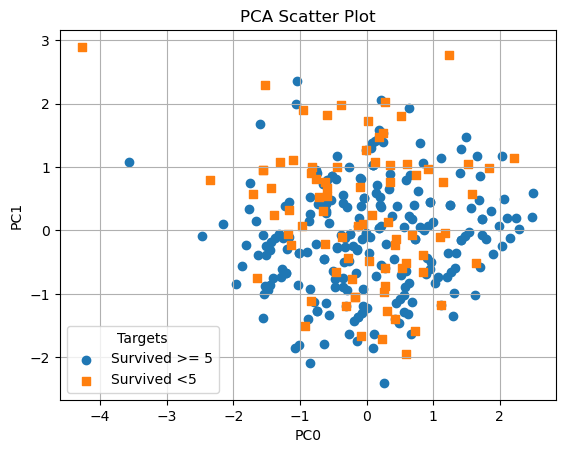

In [33]:
#Taking Only 2 Principle Component
Plot_mat = PCAAnalysis([0,1])
Plot_mat = np.asarray(Plot_mat)

print(Plot_mat.shape)
# Define marker styles for each class
marker_styles = ['o', 's', '^']  # Use different markers for each class

# Plot the scatter plot with different markers
scatter_handles = []
for label in set(targets):
    mask = [t == label for t in targets]
    scatter = plt.scatter(Plot_mat[0][mask],Plot_mat[1][mask], marker=marker_styles[label], label=target_names[label])
    scatter_handles.append(scatter)

plt.xlabel('PC0')
plt.ylabel('PC1')
# plt.axis('equal')
plt.grid()
plt.title('PCA Scatter Plot')

# Add legend
plt.legend(handles=scatter_handles, title='Targets')
plt.savefig('[0,1].png')


plt.show()

Subset:  [1, 2]
No of principle components:  2
Covariance for this subset is: 
[[ 8.95101395e-01 -1.95108046e-16]
 [-1.95108046e-16  9.99720805e-01]]
(2, 306)


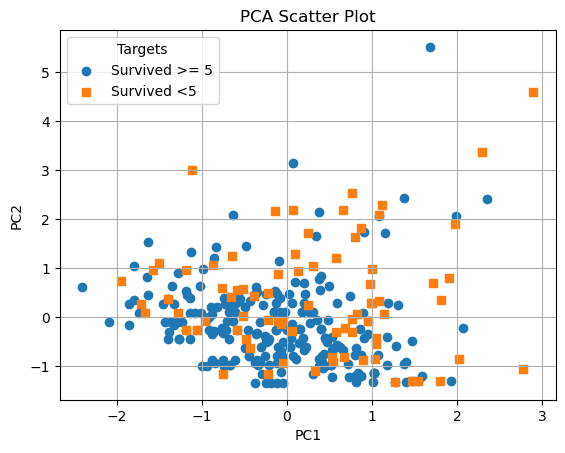

In [34]:
#Taking Only 2 Principle Component
Plot_mat = PCAAnalysis([1,2])
Plot_mat = np.asarray(Plot_mat)

print(Plot_mat.shape)
# Define marker styles for each class
marker_styles = ['o', 's', '^']  # Use different markers for each class

# Plot the scatter plot with different markers
scatter_handles = []
for label in set(targets):
    mask = [t == label for t in targets]
    scatter = plt.scatter(Plot_mat[0][mask],Plot_mat[1][mask], marker=marker_styles[label], label=target_names[label])
    scatter_handles.append(scatter)

plt.xlabel('PC1')
plt.ylabel('PC2')
# plt.axis('equal')
plt.grid()
plt.title('PCA Scatter Plot')

# Add legend
plt.legend(handles=scatter_handles, title='Targets')
plt.savefig('[1,2].png')


plt.show()

Subset:  [0, 2]
No of principle components:  2
Covariance for this subset is: 
[[1.11501387e+00 5.60571626e-17]
 [5.60571626e-17 9.99720805e-01]]
(2, 306)


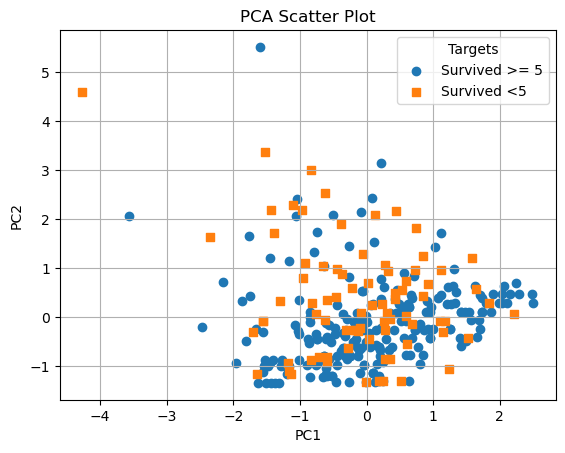

In [35]:
#Taking Only 2 Principle Component
Plot_mat = PCAAnalysis([0,2])
Plot_mat = np.asarray(Plot_mat)

print(Plot_mat.shape)
# Define marker styles for each class
marker_styles = ['o', 's', '^']  # Use different markers for each class

# Plot the scatter plot with different markers
scatter_handles = []
for label in set(targets):
    mask = [t == label for t in targets]
    scatter = plt.scatter(Plot_mat[0][mask],Plot_mat[1][mask], marker=marker_styles[label], label=target_names[label])
    scatter_handles.append(scatter)

plt.xlabel('PC1')
plt.ylabel('PC2')
# plt.axis('equal')
plt.grid()
plt.title('PCA Scatter Plot')

# Add legend
plt.legend(handles=scatter_handles, title='Targets')
plt.savefig('[0,2].png')


plt.show()

Subset:  [0, 1, 2]
No of principle components:  3
Covariance for this subset is: 
[[ 1.11501387e+00 -1.89283926e-17  5.60571626e-17]
 [-1.89283926e-17  8.95101395e-01 -1.95108046e-16]
 [ 5.60571626e-17 -1.95108046e-16  9.99720805e-01]]


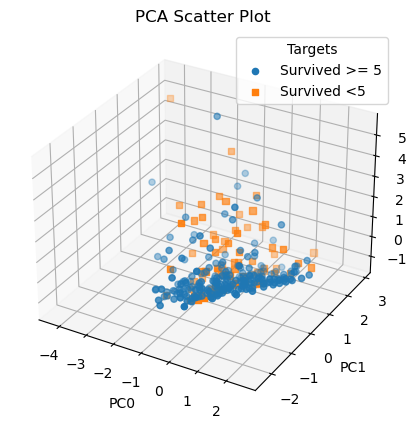

In [36]:
#Taking Only 3 Principle Component
Plot_mat = PCAAnalysis([0,1,2]).T
Plot_mat = np.asarray(Plot_mat)

# print(Plot_mat.shape) 
# Define marker styles for each class
marker_styles = ['o', 's', '^']  # Use different markers for each class

# Plot the scatter plot with different markers
fig = plt.figure(figsize = (5,5))
ax = fig.add_subplot(111, projection='3d')
a = Plot_mat[:, 0]
b = Plot_mat[:, 1]
c = Plot_mat[:, 2]

scatter_handles = []
for label in set(targets):
    mask = [t == label for t in targets]
    scatter = ax.scatter(a[mask],b[mask], c[mask], marker=marker_styles[label], label=target_names[label])
    scatter_handles.append(scatter)

ax.set_xlabel('PC0')
ax.set_ylabel('PC1')
ax.set_zlabel('PC2')
# plt.axis('equal')
plt.grid()
plt.title('PCA Scatter Plot')

# Add legend
plt.legend(handles=scatter_handles, title='Targets')
plt.savefig('[0,1,2].png')


plt.show()